In [424]:
from datetime import datetime
from PIL import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [425]:
path_to_csv = '../Data/Image_Vectors/'

### set up lists that represent bins for the time period to seperate works into

In [426]:
batch1 = []    # upto_1962
batch2 = []    # a1963_a1967
batch3 = []    # a1972_a1984
batch4 = []    # a1985_a1992
batch5 = []    # a1993_a2004

In [427]:
cat_master = pd.read_csv('../Data/master.csv')
cat_master.head()

,a_id,ids,link,title,no_pieces,circa,year_made,"medium (alpha, )",support,height (cm),...,no_ex,no_exspaces,no_semsoloex,no_pub,red,green,blue,hue,saturation,light
0,a1947_003,1947.003,https://www.artifexpress.com/catalogues/agnes-...,Self Portrait,1,1,1947,encaustic,canvas,66.0,...,2,2,1,0,96,83,58,39,0.25,0.3
1,a1947_006,1947.006,https://www.artifexpress.com/catalogues/agnes-...,Portrait of Daphne Vaughn,1,1,1947,encaustic,canvas,50.8,...,2,4,0,4,122,65,36,20,0.54,0.31
2,a1947_001,1947.001,https://www.artifexpress.com/catalogues/agnes-...,Nude,1,0,1947,oil,canvas,50.8,...,3,6,0,4,125,122,73,57,0.26,0.39
3,a1948_001,1948.001,https://www.artifexpress.com/catalogues/agnes-...,Untitled,1,1,1948,encaustic,canvas,45.7,...,2,4,0,2,87,65,64,3,0.15,0.3
4,a1949_001,1949.001,https://www.artifexpress.com/catalogues/agnes-...,Untitled,1,1,1949,oil,masonite,25.6,...,2,4,0,6,91,48,38,11,0.41,0.25


In [428]:
art_ids = cat_master['a_id'].tolist()
len(art_ids), cat_master.shape[0]

(638, 638)

In [429]:
# loop through ids, drop '.xxx' and 'a' to get year
# check to see which bin the work belongs to, append
# art_id to year bin list
for art_id in art_ids:
    
    # ID in aYYYY.000 format, split on '.', remove 'a'
    a_year = str(art_id).split('_')[0]
    
    # make sure year is type int
    year = int(a_year[1:])
    
    if year <= 1962:
        batch1.append(art_id)
        
    if (year >= 1963) and (year <= 1967) :
        batch2.append(art_id)
        
    if (year >= 1972) and (year <= 1984) :
        batch3.append(art_id)
        
    if (year >= 1985) and (year <= 1992) :
        batch4.append(art_id)
        
    if (year >= 1993):
        batch5.append(art_id)
        
print(f'Batch 1 upto   1962: {len(batch1)}')
print(f'Batch 2 1963 - 1967: {len(batch2)}')
print(f'Batch 3 1972 - 1984: {len(batch3)}')
print(f'Batch 4 1985 - 1992: {len(batch4)}')
print(f'Batch 5 1993 - 2004: {len(batch5)}')

Batch 1 upto   1962: 140
Batch 2 1963 - 1967: 63
Batch 3 1972 - 1984: 110
Batch 4 1985 - 1992: 100
Batch 5 1993 - 2004: 225


In [430]:
assert cat_master.shape[0] == (len(batch1) + len(batch2) + len(batch3) + len(batch4) + len(batch5))

### TODO

* **fix/clean/save texture features**

* **save batch a_id lists**

* **get top 50% comps for shape for each batch**

* **get top 50% comps for texture for each batch of shape comps**

* **get top 25% comps for color for each batch of shape->texture comps**

In [543]:
shape_df = pd.read_csv(path_to_csv+'shape_image_features_adaptive.csv', header=None)
cols = shape_df.columns.tolist()
cols[0] = 'aid'
shape_df.columns = cols
shape_df.iloc[:,1:] = shape_df.iloc[:,1:].apply(lambda x: (x-x.min()) / (x.max()-x.min()), axis=0)
shape_df.head()

,aid,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a1947_001,0.972412,0.812601,0.980180,0.965428,0.972303,0.793399,0.970079,0.526313,0.981297,...,0.956099,0.974975,0.978599,0.941670,0.956966,0.863067,0.922854,0.662027,0.951104,0.404297
1,a1947_003,0.951434,0.320870,0.947836,0.962148,0.939621,0.683767,0.969293,0.727508,0.956807,...,0.921716,0.954644,0.978633,0.960906,0.964414,0.418058,0.919650,0.634213,0.927067,0.526530
2,a1947_006,0.912273,0.754856,0.913630,0.933997,0.939957,0.759414,0.973079,0.390393,0.912879,...,0.947811,0.955948,0.917404,0.875367,0.940390,0.834138,0.952041,0.605385,0.957663,0.610499
3,a1948_001,0.965648,0.654830,0.976462,0.986617,0.977007,0.915785,0.933149,0.640488,0.969312,...,0.934443,0.936032,0.945981,0.959244,0.936593,0.555961,0.929912,0.649167,0.947238,0.725394
4,a1949_001,0.978921,0.743829,0.955327,0.971991,0.973731,0.761723,0.958054,0.524270,0.979029,...,0.940429,0.968025,0.969008,0.962076,0.945620,0.788885,0.944995,0.622236,0.948133,0.408922


In [432]:
texture_df = pd.read_csv(path_to_csv+'texture_description_vectors.csv', header=None)
cols = texture_df.columns.tolist()
cols[0] = 'aid'
texture_df.columns = cols
texture_df.iloc[:,1:] = texture_df.iloc[:,1:].apply(lambda x: (x-x.min()) / (x.max()-x.min()), axis=0)
texture_df.head()

,aid,1,2,3,4,5,6,7,8,9,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600
0,a1947_001,0.514150,0.265934,0.347275,0.638637,0.089011,1.000000,0.688058,0.276582,0.305175,...,0.135159,0.104632,0.230015,0.341014,0.543236,0.039550,0.371732,0.250054,0.190707,0.098112
1,a1947_003,0.370983,0.137104,0.118804,0.182523,0.019188,0.334313,0.354051,0.220250,0.364697,...,0.154438,0.872277,0.244252,0.197801,0.246631,0.032644,0.188135,0.216852,0.195422,0.401437
2,a1947_006,0.659011,0.379720,0.297674,0.434500,0.051944,0.779842,0.835253,0.515074,0.526464,...,0.142707,0.187639,0.482553,0.419690,0.418904,0.029940,0.314991,0.242675,0.261885,0.167890
3,a1948_001,0.396159,0.141852,0.168544,0.190031,0.022982,0.518065,0.707133,0.337079,0.327903,...,0.097683,0.099595,0.214734,0.205638,0.179756,0.011128,0.168466,0.151750,0.154219,0.091464
4,a1949_001,0.037382,0.055482,0.063927,0.050397,0.136572,0.054895,0.083589,0.050876,0.023491,...,0.047821,0.283749,0.050173,0.072689,0.063375,0.027595,0.078382,0.065020,0.043969,0.216211


In [595]:
color_df = pd.read_csv(path_to_csv+'color_8_10_8_features.csv', header=None)
cols = color_df.columns.tolist()
cols[0] = 'aid'
color_df.columns = cols
color_df.iloc[:,1:] = color_df.iloc[:,1:].apply(lambda x: (x)**3, axis=0)
color_df.iloc[:,1:] = color_df.iloc[:,1:].apply(lambda x: (x-x.min()) / (x.max()-x.min()), axis=0)
color_df.fillna(0, inplace=True)
color_df = color_df.iloc[:,:641]
color_df.head()

,aid,1,2,3,4,5,6,7,8,9,...,631,632,633,634,635,636,637,638,639,640
0,a1947_001,1.026538e-09,1.405997e-05,2.803994e-04,3.158572e-06,1.392709e-06,3.763441e-09,4.332748e-12,0.000074,3.873714e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a1947_003,0.000000e+00,8.943771e-06,6.780856e-05,8.007917e-09,1.694582e-09,2.580144e-11,0.000000e+00,0.000003,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a1947_006,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.879446e-12,6.880336e-13,5.433112e-12,0.000001,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a1948_001,0.000000e+00,5.105338e-05,5.329554e-06,2.310379e-10,7.555533e-10,2.301219e-11,9.738926e-10,0.000014,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a1949_001,6.074745e-07,3.057822e-11,4.161946e-13,2.640827e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000001,1.229562e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [596]:
color_df.shape, texture_df.shape, shape_df.shape

((637, 641), (637, 3601), (637, 25))

In [555]:
"""
a1958_016               --> missing from batch 1
_________               --> missing from batch 2
a1980_020               --> missing from batch 3
a1985_027, a1988_006    --> missing from batch 4
a1999_001, a1999_004    --> missing from batch 5
"""

'\na1958_016               --> missing from batch 1\n_________               --> missing from batch 2\na1980_020               --> missing from batch 3\na1985_027, a1988_006    --> missing from batch 4\na1999_001, a1999_004    --> missing from batch 5\n'

In [556]:
batch1.remove('a1958_016')
batch3.remove('a1980_020')
batch4.remove('a1985_027')
batch4.remove('a1988_006')
batch5.remove('a1999_001')
batch5.remove('a1999_004')

ValueError: list.remove(x): x not in list

In [557]:
# set up shape batch's
shape_batch1 = shape_df[shape_df['aid'].isin(batch1)]
shape_batch1 = shape_batch1.reset_index(drop=True)
shape_batch1.shape

(137, 25)

In [558]:
# set up texture batch's
texture_batch1 = texture_df[texture_df['aid'].isin(batch1)]
texture_batch1 = texture_batch1.reset_index(drop=True)
texture_batch1.shape

(137, 3601)

In [621]:
# set up color batch's
color_batch1 = color_df[color_df['aid'].isin(batch1)]
color_batch1 = color_batch1.reset_index(drop=True)
color_batch1.shape

(137, 641)

In [560]:
class SimilarityRanking:
    def __init__(self, indexPath):
        """
        Set directory path for the file of image vectors.
        
        ----------
        Parameters
        ----------
        indexPath : srting, directory path to image vectors.
        
        return    : Doesn't return anythin just sets the indexPath variable
        """
        # set the indexPath to where the image vector file is
        self.indexPath = indexPath
        
        
    def search(self, queryFeatures, metric = 'chi-squared', limit = 5):
        """
        
        """
        
        # initialize results dictionary
        results = {}
        
        # open the file to read image vectors
        with open(self.indexPath) as f:
            # initiate the CSV reader
            reader = csv.reader(f)
            
            # loop over the rows
            for row in reader:
                # parse out the image ID and feature vector, then compute
                # the distance between features in our file and the image
                # being queried
                features = [float(x) for x in row[1:]]
                
                # calculate the distance from the image and the query image
                # default chi-squared but user can choose between those below
                if metric == 'chi-squared':
                    dist = self.chi2_distance(features, queryFeatures)
                elif metric == 'euclidean':
                    pass
                elif metric == 'cosine':
                    pass
                elif metric == 'minkowski':
                    pass
                
                # once we have the distance, upadte results dictionary using
                # the image ID as the key and the distance as the value, the
                # distance represents similar of the image to the query image
                results[row[0]] = dist
                
            # close the reader
            f.close
            
        # sort the results smallest to largest
        results = sorted( [(v, k) for (k, v) in results.items()] )
        
        # return the results limited by limit parameter
        return results[1:limit]
                
    
    def chi2_distance(self, histA, histB, eps = 1e-10):
        """
        
        """
        
        # compute the chi-squared distance
        dist = 0.5 * np.sum( [ ((a - b) ** 2) / (a + b + eps) 
                              for (a, b) in zip(histA, histB) ] )
        
        # return the chi-squared distance
        return dist
        
        

In [561]:
def chi2_distance(histA, histB, eps = 1e-10):
        # compute the chi-squared distance
        dist = 0.5 * np.sum( [ ((a - b) ** 2) / (a + b + eps) 
                              for (a, b) in zip(histA, histB) ] )
        
        # return the chi-squared distance
        return dist

In [597]:
#
comps = []

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

#
for i in range(len(shape_batch1)):
    
    #
    aid = shape_batch1['aid'].at[i]
    query = shape_batch1.iloc[i, 1:].tolist()
    
    #
    results = {}
    
    #
    for j in range(len(shape_batch1)):
        features = shape_batch1.iloc[j, 1:].tolist()
        dist = chi2_distance(query, features)

        results[shape_batch1['aid'].at[j]] = dist

    # sort the results smallest to largest
    results = sorted( [(v, k) for (k, v) in results.items()] )

    #
    results[0] = aid
    results = results[:35]
    comps.append(results)

now = datetime.now()
end_time = now.strftime("%H:%M:%S")
print("Current Time =", end_time)

Current Time = 19:31:08
Current Time = 19:31:15


In [598]:
comps[125]

['a1962_009',
 (0.019631223793695855, 'a1954_003'),
 (0.026135233619676977, 'a1954_002'),
 (0.027502226534944704, 'a1960_022'),
 (0.02980699752997233, 'a1948_001'),
 (0.030040980328546903, 'a1960_009'),
 (0.03084207391521778, 'a1960_001'),
 (0.03138109042424246, 'a1960_013'),
 (0.03194750897556921, 'a1959_006'),
 (0.03257131441314729, 'a1961_033'),
 (0.03364837043020464, 'a1959_031'),
 (0.034767700979011766, 'a1955_002'),
 (0.03520004480105726, 'a1958_010'),
 (0.03524776001180994, 'a1954_010'),
 (0.03544253889840064, 'a1962_001'),
 (0.03649007942011758, 'a1959_030'),
 (0.038338664671006606, 'a1959_039'),
 (0.0396041296993513, 'a1960_006'),
 (0.039907760330235575, 'a1960_026'),
 (0.03999455625306606, 'a1962_050'),
 (0.04206260097812197, 'a1957_001'),
 (0.04207892286189957, 'a1962_066'),
 (0.04223068815644058, 'a1960_021'),
 (0.043562778822947276, 'a1958_005'),
 (0.04378379369471921, 'a1962_008'),
 (0.0440836437569906, 'a1955_007'),
 (0.04458672186962102, 'a1959_005'),
 (0.04463740111308

In [599]:
img_comps = [comps[125][i] for i in range(len(comps[125]))]

temp = []
for elm in img_comps[1:]:
    work = elm[1].replace('a','').replace('_','.')
    temp.append(work)
    
temp

['1954.003',
 '1954.002',
 '1960.022',
 '1948.001',
 '1960.009',
 '1960.001',
 '1960.013',
 '1959.006',
 '1961.033',
 '1959.031',
 '1955.002',
 '1958.010',
 '1954.010',
 '1962.001',
 '1959.030',
 '1959.039',
 '1960.006',
 '1960.026',
 '1962.050',
 '1957.001',
 '1962.066',
 '1960.021',
 '1958.005',
 '1962.008',
 '1955.007',
 '1959.005',
 '1962.004',
 '1959.035',
 '1962.056',
 '1954.008',
 '1960.037',
 '1960.064',
 '1960.023',
 '1961.018']

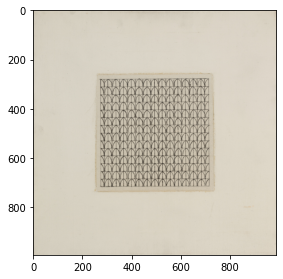

In [600]:
img = Image.open('../Data/Paintings/1962.007.png')
plt.figure(figsize=(4.5, 4.5))
plt.imshow(img);

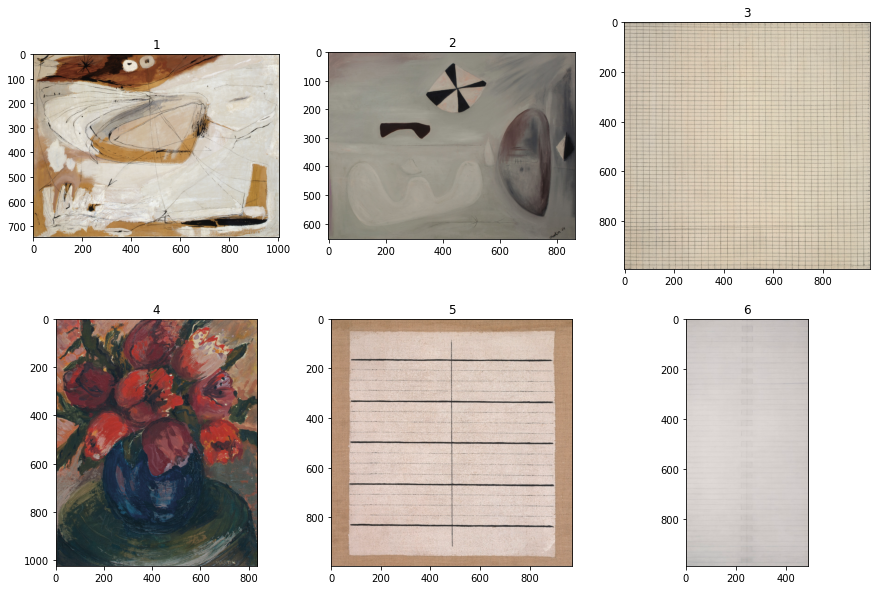

In [601]:
plt.figure(figsize=(15,10)) # specifying the overall grid size
for i in range(1, 7):
    plt.subplot(2,3,i)    # the number of images in the grid is 3*3 (9)
    img = Image.open('../Data/Paintings/' + temp[i-1] + '.png')
    plt.title(i)
    plt.imshow(img)
plt.show()

In [602]:
individual_comps = []
for comp in comps:
    temp = comp
    comp_list = []
    for elem in comp[1:]:
        comp_list.append(elem[-1])
    individual_comps.append(comp_list)

In [603]:
full_comps = []

for i in range(len(comps)):
    aid = comps[i][0]
    temp = []
    for j in range(1,35):
        comp = comps[i][j][1]
        temp.append(comp)
    all_sim = [aid] + temp
    full_comps.append(all_sim)
    

cols = ['aid']+[x for x in range(1, 35)]
shape_comps = pd.DataFrame(full_comps, columns=cols)
shape_comps.head()

,aid,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,a1947_001,a1949_001,a1957_012,a1960_024,a1961_007,a1953_001,a1960_006,a1962_008,a1959_005,a1960_020,...,a1960_022,a1962_011,a1960_065,a1955_002,a1962_057,a1954_009,a1959_031,a1960_035,a1947_006,a1960_037
1,a1947_003,a1960_014,a1958_027,a1962_013,a1958_025,a1958_010,a1957_001,a1962_007,a1958_007,a1959_004,...,a1962_009,a1957_013,a1962_023,a1958_023,a1960_058,a1962_057,a1959_039,a1961_003,a1960_091,a1959_007
2,a1947_006,a1958_013,a1959_017,a1959_028,a1962_057,a1960_006,a1959_039,a1960_011,a1962_008,a1959_029,...,a1949_001,a1953_001,a1960_013,a1961_033,a1960_021,a1954_003,a1955_007,a1959_041,a1959_031,a1962_009
3,a1948_001,a1962_009,a1954_002,a1959_024,a1958_010,a1960_029,a1960_022,a1960_009,a1955_002,a1954_003,...,a1962_011,a1960_026,a1961_003,a1958_023,a1960_058,a1959_006,a1961_018,a1954_008,a1960_037,a1961_006
4,a1949_001,a1959_005,a1959_007,a1947_001,a1960_006,a1955_007,a1962_050,a1957_017,a1960_024,a1961_018,...,a1960_015,a1962_011,a1958_005,a1957_001,a1960_020,a1960_037,a1959_035,a1959_031,a1957_013,a1958_013


In [604]:
shape_comps['aid'].loc[0]

'a1947_001'

In [605]:
# query => aid and texture vector
query_id = shape_comps['aid'].loc[0]
query_features = texture_batch1.iloc[:,1:][texture_batch1['aid'] == query_id].values.tolist()[0]

# ids of comps that will need to be turned into features
feature_ids = shape_comps.iloc[:,1:][shape_comps['aid'] == query_id].values.tolist()[0]

In [606]:
feature_id = feature_ids[-1]
feature_id

'a1960_037'

In [607]:
features = texture_batch1.iloc[:,1:][texture_batch1['aid'] == feature_id].values.tolist()[0]

In [608]:
dist = chi2_distance(query_features, features)
dist

404.51457294331425

In [609]:
comps = []

for i in range(len(shape_comps)):
    # query => aid and texture vector
    query_id = shape_comps['aid'].loc[i]
    query_features = texture_batch1.iloc[:,1:][texture_batch1['aid'] == query_id].values.tolist()[0]

    # ids of comps that will need to be turned into features
    feature_ids = shape_comps.iloc[:,1:][shape_comps['aid'] == query_id].values.tolist()[0]
    
    #
    results = {}
    
    #
    for j in range(len(feature_ids)):
        feature_id = feature_ids[j]
        features = texture_batch1.iloc[:,1:][texture_batch1['aid'] == feature_id].values.tolist()[0]
        
        dist = chi2_distance(query_features, features)
        
        
        results[feature_id] = dist

    # sort the results smallest to largest
    results = sorted( [(v, k) for (k, v) in results.items()] )

    #
    results[0] = query_id
    results = results[:15]
    comps.append(results)


In [610]:
comps[125]

['a1962_009',
 (58.16993456856605, 'a1960_022'),
 (62.76172098894227, 'a1962_004'),
 (68.37984308500097, 'a1962_056'),
 (71.3773959441375, 'a1962_001'),
 (77.1606997303358, 'a1962_008'),
 (91.97628845721982, 'a1961_018'),
 (94.72295283485862, 'a1960_023'),
 (103.2372875066709, 'a1948_001'),
 (104.7948147394149, 'a1960_064'),
 (109.10912955441114, 'a1960_021'),
 (138.82061205002748, 'a1954_003'),
 (143.07266876347555, 'a1962_050'),
 (143.3091246961102, 'a1954_008'),
 (165.01286331930743, 'a1954_010')]

In [611]:
img_comps = [comps[125][i] for i in range(len(comps[0]))]

temp = []
for elm in img_comps[1:]:
    work = elm[1].replace('a','').replace('_','.')
    temp.append(work)
    
temp

['1960.022',
 '1962.004',
 '1962.056',
 '1962.001',
 '1962.008',
 '1961.018',
 '1960.023',
 '1948.001',
 '1960.064',
 '1960.021',
 '1954.003',
 '1962.050',
 '1954.008',
 '1954.010']

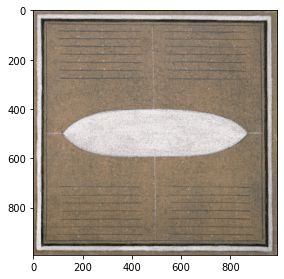

In [612]:
img = Image.open('../Data/Paintings/1962.009.png')
plt.figure(figsize=(4.5, 4.5))
plt.imshow(img);

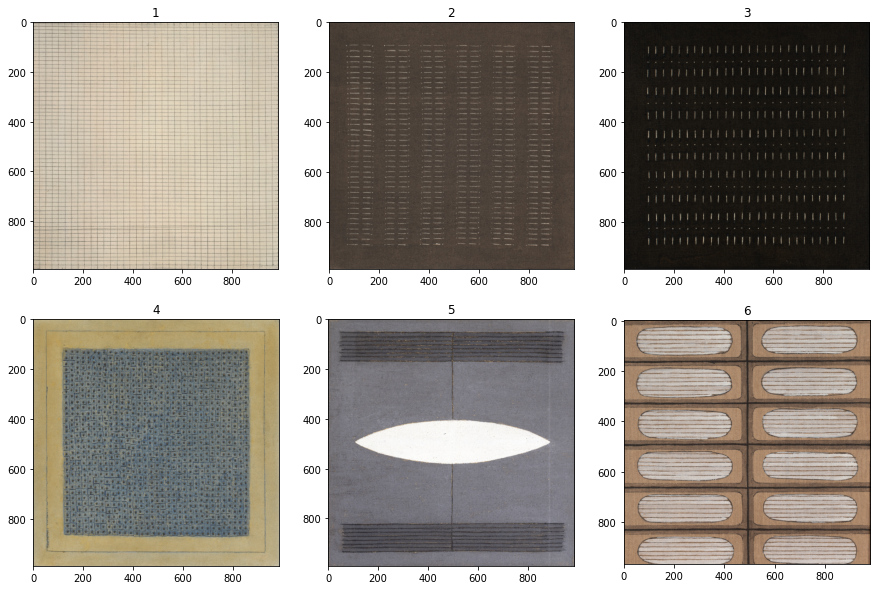

In [614]:
plt.figure(figsize=(15,10)) # specifying the overall grid size
for i in range(1, 7):
    plt.subplot(2,3,i)    # the number of images in the grid is 3*3 (9)
    img = Image.open('../Data/Paintings/' + temp[i-1] + '.png')
    plt.title(i)
    plt.imshow(img)
plt.show()

In [622]:
layered_comps = []

for i in range(len(comps)):
    aid = comps[i][0]
    temp = []
    for j in range(1,15):
        comp = comps[i][j][1]
        temp.append(comp)
    all_sim = [aid] + temp
    layered_comps.append(all_sim)
    


cols = ['aid']+[x for x in range(1, 15)]
shape_texture_layered = pd.DataFrame(layered_comps, columns=cols)
shape_texture_layered.head()

,aid,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,a1947_001,a1960_022,a1962_011,a1962_057,a1962_004,a1961_018,a1947_006,a1962_008,a1962_056,a1960_024,a1959_017,a1960_020,a1961_003,a1961_007,a1960_018
1,a1947_003,a1958_025,a1962_050,a1961_003,a1958_010,a1962_009,a1962_013,a1958_008,a1962_003,a1962_023,a1959_035,a1949_002,a1962_057,a1961_049,a1959_030
2,a1947_006,a1962_004,a1962_008,a1960_022,a1960_011,a1959_017,a1962_057,a1962_001,a1960_023,a1961_018,a1953_001,a1962_050,a1960_021,a1954_003,a1962_023
3,a1948_001,a1962_004,a1961_003,a1962_056,a1952_014,a1960_022,a1962_009,a1954_004,a1954_008,a1962_011,a1958_010,a1960_009,a1954_003,a1954_009,a1959_035
4,a1949_001,a1959_010,a1957_001,a1957_013,a1957_012,a1958_005,a1955_007,a1960_006,a1959_007,a1959_035,a1959_005,a1959_031,a1958_013,a1959_039,a1960_037


In [623]:
# query => aid and color vector
query_id = shape_texture_layered['aid'].loc[10]
query_features = color_batch1.iloc[:,1:][color_batch1['aid'] == query_id].values.tolist()[0]

# ids of comps that will need to be turned into features
feature_ids = shape_texture_layered.iloc[:,1:][shape_texture_layered['aid'] == query_id].values.tolist()[0]

In [624]:
feature_id = feature_ids[0]
feature_id

'a1959_024'

In [625]:
features = color_batch1.iloc[:,1:][color_batch1['aid'] == feature_id].values.tolist()[0]

In [626]:
len(features)

640

In [627]:
dist = chi2_distance(query_features, features)
dist

3.2465640061745153

In [628]:
comps = []

for i in range(len(shape_comps)):
    # query => aid and texture vector
    query_id = shape_texture_layered['aid'].loc[i]
    query_features = color_batch1.iloc[:,1:][color_batch1['aid'] == query_id].values.tolist()[0]

    # ids of comps that will need to be turned into features
    feature_ids = shape_texture_layered.iloc[:,1:][shape_texture_layered['aid'] == query_id].values.tolist()[0]
    
    #
    results = {}
    
    #
    for j in range(len(feature_ids)):
        feature_id = feature_ids[j]
        features = color_batch1.iloc[:,1:][color_batch1['aid'] == feature_id].values.tolist()[0]
        
        dist = chi2_distance(query_features, features)
        
        
        results[feature_id] = dist

    # sort the results smallest to largest
    results = sorted( [(v, k) for (k, v) in results.items()] )

    #
    results[0] = query_id
    results = results[:10]
    comps.append(results)


In [633]:
comps[12]

['a1954_004',
 (4.129703518680259, 'a1957_013'),
 (4.139291553080417, 'a1959_039'),
 (4.247352496790429, 'a1958_001'),
 (4.249621488999832, 'a1954_002'),
 (4.2515771177358, 'a1959_035'),
 (4.252415662115097, 'a1960_016'),
 (4.291692019399549, 'a1961_001'),
 (4.368417138813666, 'a1954_009'),
 (4.770320730181419, 'a1953_001')]

In [634]:
img_comps = [comps[12][i] for i in range(len(comps[100]))]

temp = []
for elm in img_comps[1:]:
    work = elm[1].replace('a','').replace('_','.')
    temp.append(work)
    
temp

['1957.013',
 '1959.039',
 '1958.001',
 '1954.002',
 '1959.035',
 '1960.016',
 '1961.001',
 '1954.009',
 '1953.001']

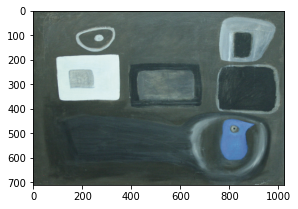

In [635]:
img = Image.open('../Data/Paintings/1954.004.png')
plt.figure(figsize=(4.5, 4.5))
plt.imshow(img);

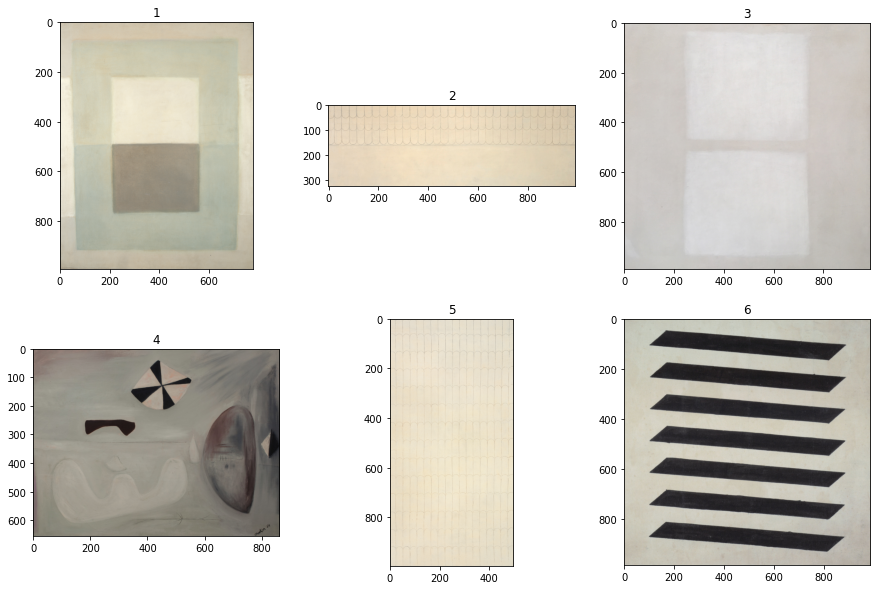

In [636]:
plt.figure(figsize=(15,10)) # specifying the overall grid size
for i in range(1, 7):
    plt.subplot(2,3,i)    # the number of images in the grid is 3*3 (9)
    img = Image.open('../Data/Paintings/' + temp[i-1] + '.png')
    plt.title(i)
    plt.imshow(img)
plt.show()